In [1]:
%load_ext autoreload

from spikesorting.utils import plot_traces
from spikesorting.utils import load

import matplotlib.pyplot as plt

# Custom plotting library
import joli
plt.style.use('white')
plt.rcParams['figure.dpi'] = 140

# Loading data

## Spyking Circus data
Link: https://zenodo.org/records/1205233#.WrQEpnXwaV4

BinaryRecordingExtractor: 256 channels - 20.0kHz - 1 segments - 6,000,003 samples 
                          300.00s (5.00 minutes) - int16 dtype - 2.86 GiB
  file_paths: ['C:\\Users\\roque\\Desktop\\These\\Travail\\Codes\\SpikeSorting\\data\\spyking_circus\\20160415\\patch_2_MEA.raw']


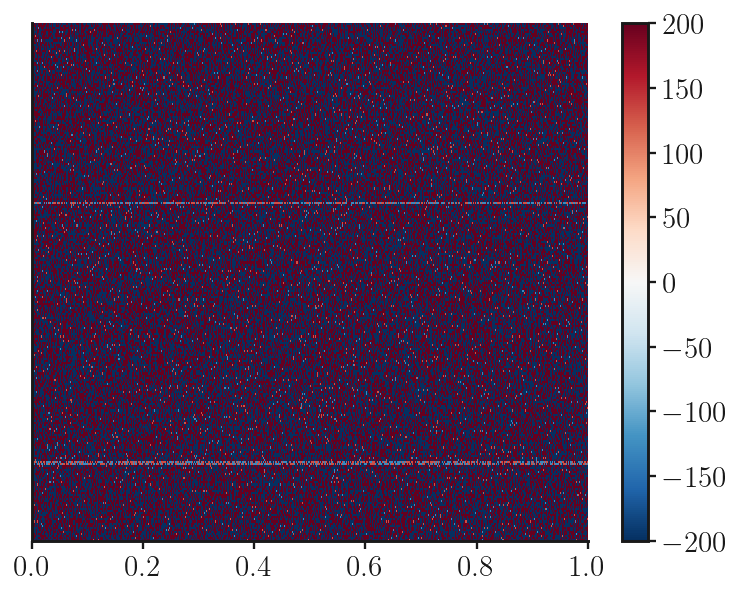

In [16]:
%autoreload
datapath = f'spyking_circus/20160415/patch_2_MEA.raw'
probepath = f'spyking_circus/mea_256.prb'

recording = load(datapath, probepath)
plot_traces(recording, time_range=(0, 1))

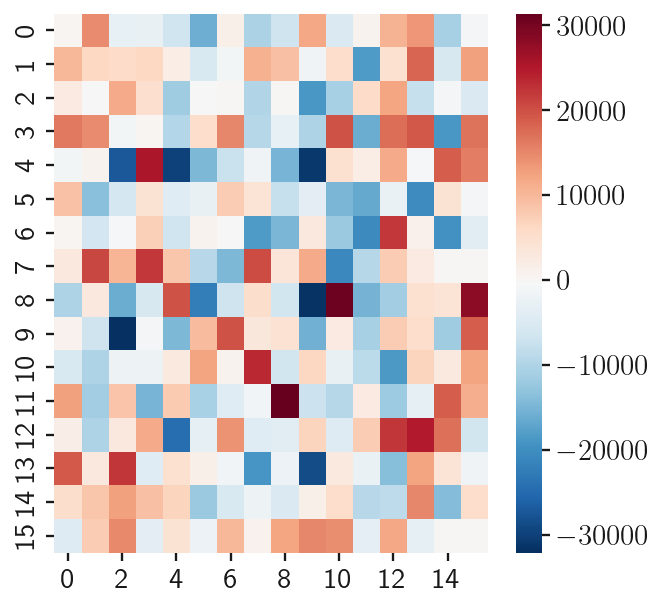

In [15]:
import seaborn as sns
import numpy as np

_, ax = plt.subplots(figsize=(5, 5))

start = 20000
end = 20100
traces_raw = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

# Add missing channels due to stimulation electrodes
traces = np.zeros((100, 256))
traces[:, :126] = traces_raw[:, :126]
traces [:, 128:254] = traces_raw[:, 126:]

traces = np.reshape(traces, (100, 16, 16))
sns.heatmap(traces[25, :, :], cmap='RdBu_r')
plt.show()

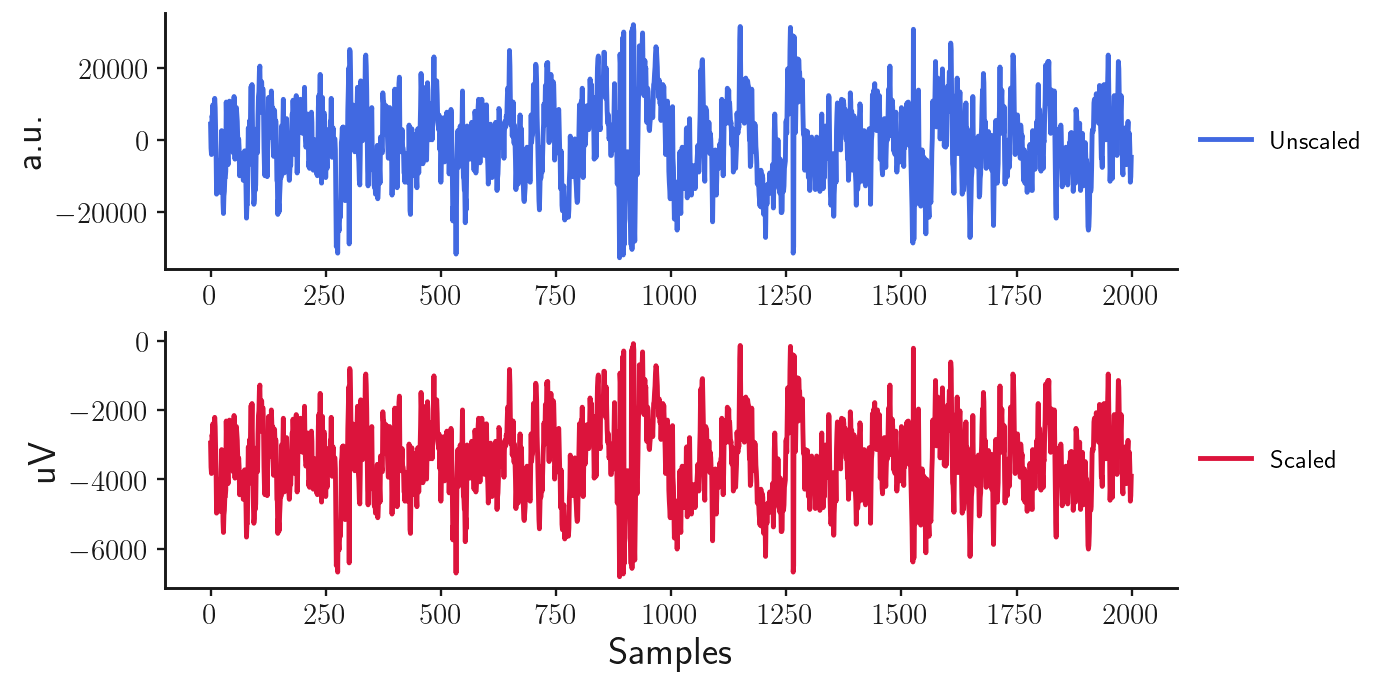

In [14]:
_, axes = plt.subplots(2, 1, figsize=(10, 5))

start = 20000
end = 22000
traces_unscaled = recording.get_traces(
    return_scaled=False, 
    start_frame=start, 
    end_frame=end
)
traces_scaled = recording.get_traces(
    return_scaled=True,
    start_frame=start, 
    end_frame=end
)

axes[0].plot(traces_unscaled[:, 0], label='Unscaled', c='royalblue')
axes[1].plot(traces_scaled[:, 0], label='Scaled', c='crimson')
for ax in axes:
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
axes[0].set_ylabel('a.u.')
axes[1].set_ylabel('uV')
axes[1].set_xlabel('Samples')

plt.tight_layout()
plt.show()

## Sample data
https://www.multichannelsystems.com/software/cmos-mea-tools

BinaryRecordingExtractor: 4225 channels - 25.0kHz - 1 segments - 75,012 samples - 3.00s 
                          int16 dtype - 604.49 MiB
  file_paths: ['C:\\Users\\roque\\Desktop\\These\\Travail\\Codes\\SpikeSorting\\data\\sample\\test_data.cmcr']


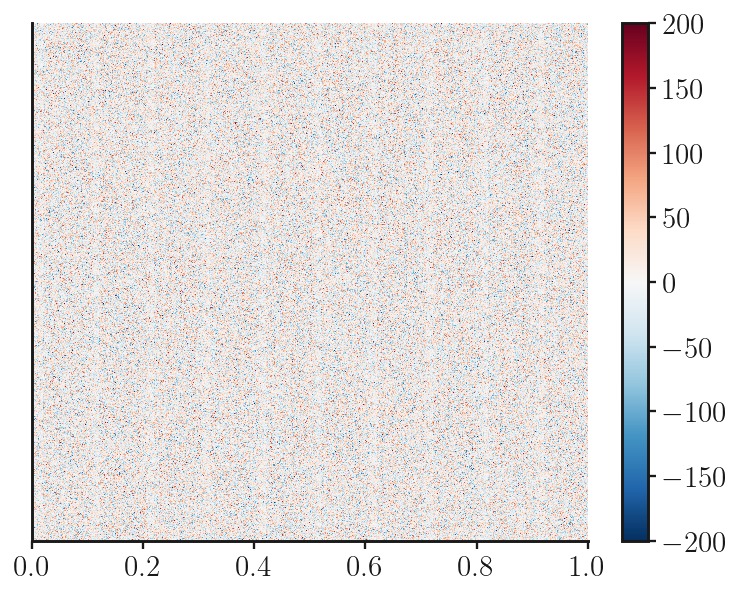

In [110]:
import spikeinterface.extractors as se

recording = se.read_binary(
    "C:/Users/roque/Desktop/These/Travail/Codes/SpikeSorting/data/sample/test_data.cmcr", 
    sampling_frequency=25000, 
    num_channels=4225,
    dtype="int16"
)

print(recording)
plot_traces(recording, time_range=(0, 1))

<Axes: >

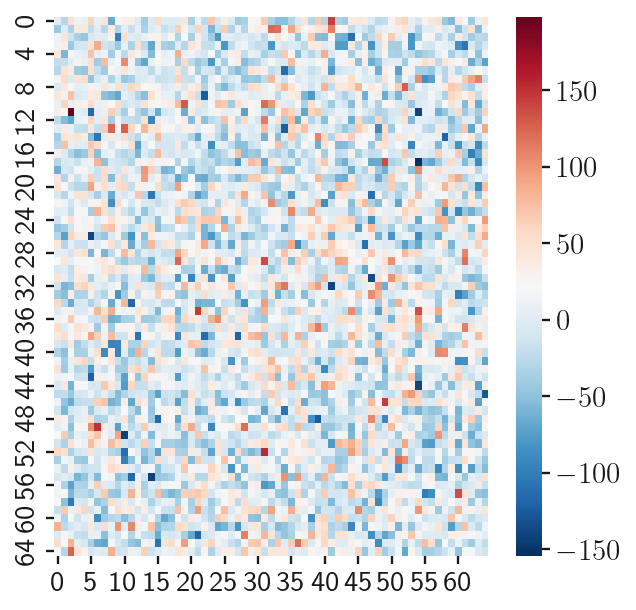

In [115]:
import seaborn as sns
import numpy as np

_, ax = plt.subplots(figsize=(5, 5))

start = 20000
end = 20100
traces_raw = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

traces = np.reshape(traces_raw, (100, 65, 65))
sns.heatmap(traces[0, :, :], cmap='RdBu_r')
plt.show()

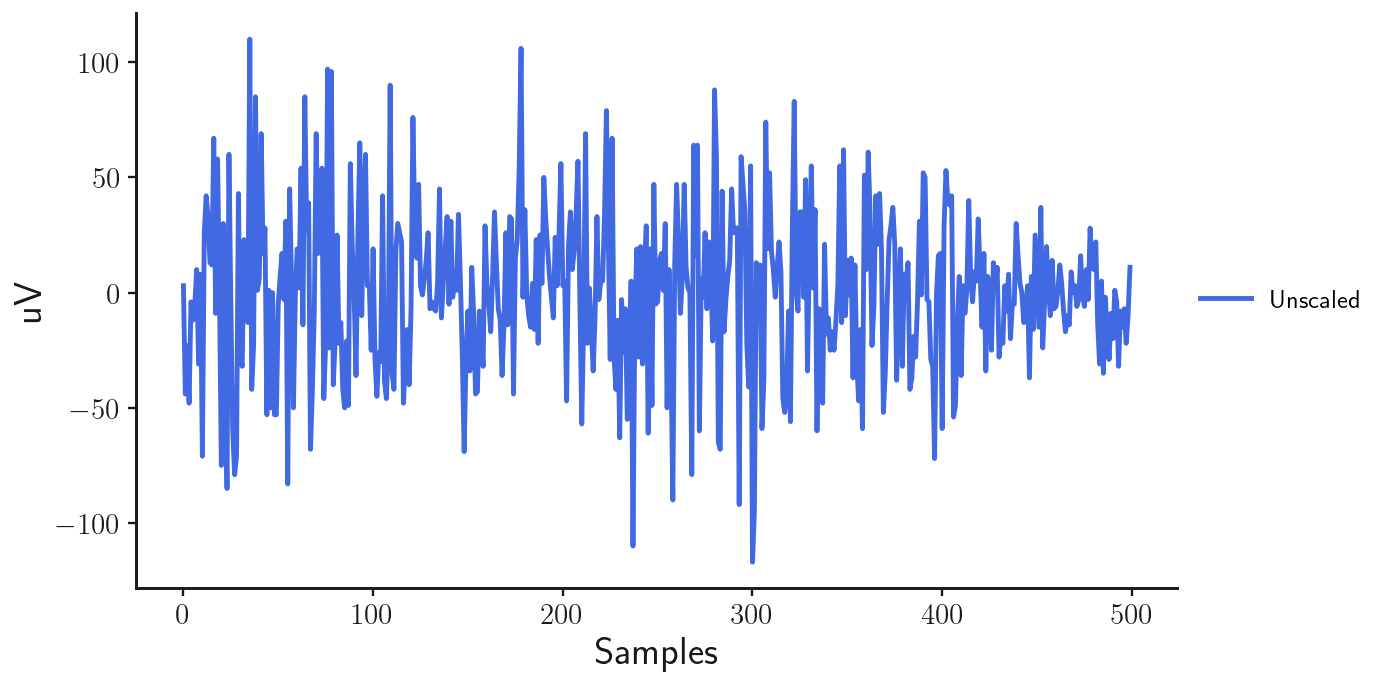

In [117]:
_, ax = plt.subplots(figsize=(10, 5))

start = 20000
end = 20500
traces_unscaled = recording.get_traces(
    return_scaled=False, 
    start_frame=start, 
    end_frame=end
)

ax.plot(traces_unscaled[:, 0], label='Unscaled', c='royalblue')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
ax.set_ylabel('a.u.')
ax.set_ylabel('uV')
ax.set_xlabel('Samples')

plt.tight_layout()
plt.show()

## rgcElStim data
https://gin.g-node.org/lhoefling/rgcElStim

In [2]:
path = "data/rgcElStim/raw/wildtype/2017-11-03/2017.11.03-11.45.52-spontan_1.cmcr"

In [17]:
import spikeinterface.extractors as se

recording = se.read_mcsh5(path)

print(recording)
plot_traces(recording, time_range=(0, 1))

ValueError: Unable to synchronously create group (no write intent on file)

In [34]:
import h5py

with h5py.File(path, "r") as f:

    print(f.get('Acquisition/Sensor Data').keys())
    # Sensor data
    sensor_data = f.get('Acquisition/Sensor Data')['SensorData 1 1'][()]
    sensor_meta = f.get('Acquisition/Sensor Data')['SensorMeta'][()]
    print(sensor_data.shape)

<KeysViewHDF5 ['SensorData 1 1', 'SensorMeta']>
(100000, 65, 65)


In [4]:
import spikeinterface.extractors as se
from probeinterface import read_prb 

recording = se.read_binary(
    path,
    sampling_frequency=25000,
    num_channels=4225,
    dtype="int16"
)
print(recording)

# Setting probe data
probe = read_prb("data/rgcElStim/mea_4225.prb")
recording = recording.set_probegroup(probe)

BinaryRecordingExtractor: 4225 channels - 25.0kHz - 1 segments - 100,015 samples - 4.00s 
                          int16 dtype - 805.98 MiB
  file_paths: ['C:\\Users\\roque\\Desktop\\These\\Travail\\Codes\\SpikeSorting\\data\\rgcElStim\\raw\\wildtype\\2017-11-03\\2017.11.03-11.45.52-spontan_1.cmcr']


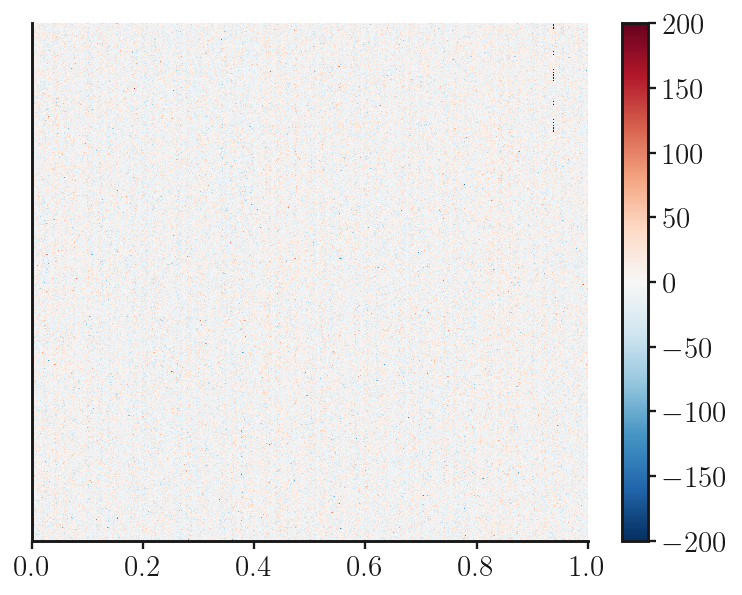

In [31]:
plot_traces(recording, time_range=(0, 1))

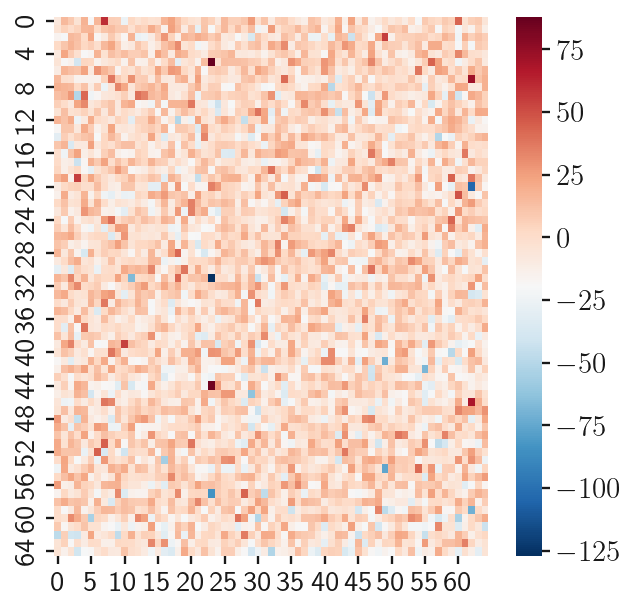

In [32]:
import seaborn as sns
import numpy as np

_, ax = plt.subplots(figsize=(5, 5))

start = 20000
end = 20100
traces_raw = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

traces = np.reshape(traces_raw, (100, 65, 65))
sns.heatmap(traces[0, :, :], cmap='RdBu_r')
plt.show()

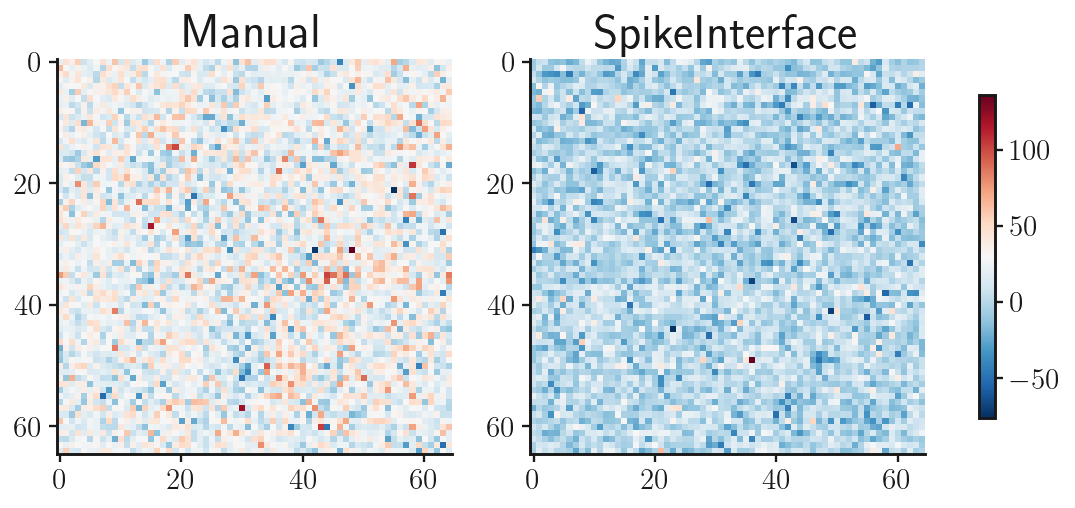

In [152]:
# Comparison between loading the file manually vs. with SpikeInterface

import seaborn as sns
import numpy as np

f, axes = plt.subplots(1, 2, figsize=(10, 5))

# With Spike Interface
img_si = traces[1, :, :]
# Manually
img_m = sensor_data[19999, :, :]

# Min max values for colorbar
vmin = min(img_si.min(), img_m.min())
vmax = max(img_si.max(), img_m.max())

# Plots
for ax, img in zip(axes, [img_m, img_si]):
    h = ax.imshow(img, vmin=img.min(), vmax=img.max(), cmap='RdBu_r')
f.colorbar(h, ax=axes.ravel().tolist(), shrink=0.6)

axes[1].set_title('SpikeInterface')
axes[0].set_title('Manual')
plt.show()

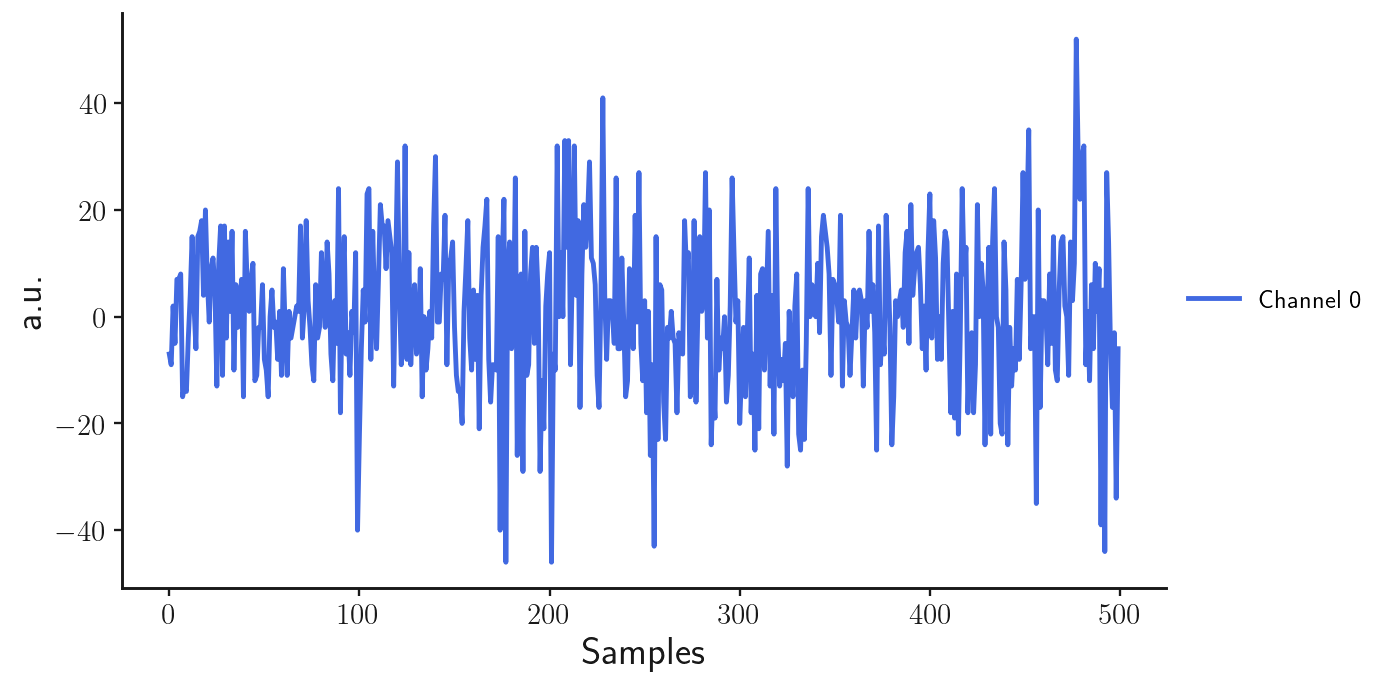

In [33]:
_, ax = plt.subplots(figsize=(10, 5))

start = 20000
end = 20500
traces = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

channel = 0
ax.plot(traces[:, channel], label=f'Channel {channel}', c='royalblue')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
ax.set_ylabel('a.u.')
ax.set_xlabel('Samples')

plt.tight_layout()
plt.show()

## Create a gif of the recording

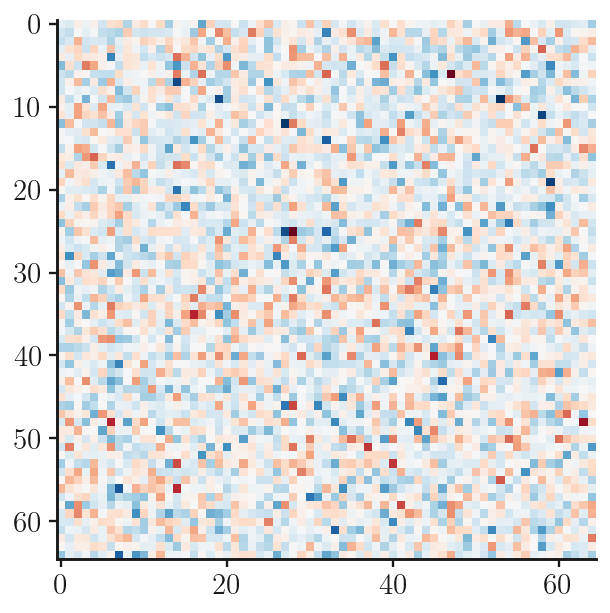

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(traces[15, :, :], cmap='RdBu_r', animated=False)
plt.show()

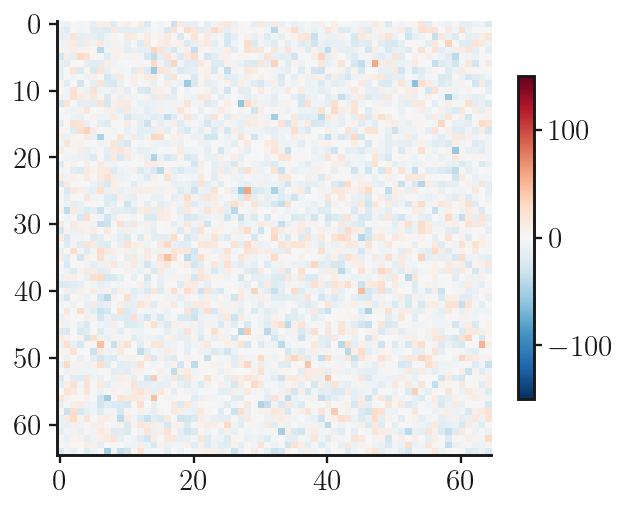

In [32]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(5, 5))

start = 15
end = 25000
traces_raw = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

traces = np.reshape(traces_raw, (-1, 65, 65))
channel = 0

# Set the initial image
im = ax.imshow(traces[channel, :, :], vmin=-150, vmax=150, cmap='RdBu_r', animated=True)
fig.colorbar(im, ax=ax, shrink=0.6)

# Update function
def update(i):
    im.set_array(traces[i, :, :])
    return im, 

# Create the animation object
animation_fig = animation.FuncAnimation(
    fig, update, frames=len(traces), interval=1, blit=True
)

# Show the animation
plt.show()

animation_fig.save("figures/movie.mp4")

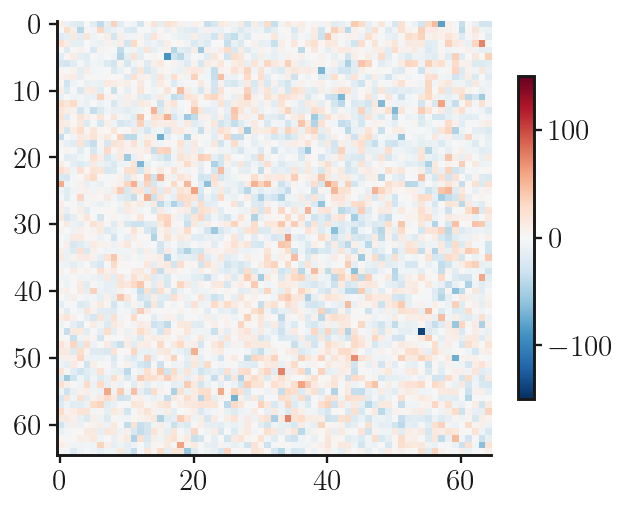

In [36]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(5, 5))

traces = sensor_data[:25000, :, :]
channel = 0

# Set the initial image
im = ax.imshow(traces[channel, :, :], vmin=-150, vmax=150, cmap='RdBu_r', animated=True)
fig.colorbar(im, ax=ax, shrink=0.6)

# Update function
def update(i):
    im.set_array(traces[i, :, :])
    return im, 

# Create the animation object
animation_fig = animation.FuncAnimation(
    fig, update, frames=len(traces), interval=1, blit=True
)

# Show the animation
plt.show()

animation_fig.save("figures/movie_manual.mp4")

# Get sorters

In [14]:
from spikesorting.utils import get_sorters, run_sorters

In [15]:
%autoreload
sorters = get_sorters()

Parameters for herdingspikes:
Herding Spikes is a density-based spike sorter designed for high-density retinal recordings.
    It uses both PCA features and an estimate of the spike location to cluster different units.
    For more information see https://doi.org/10.1016/j.jneumeth.2016.06.006
{'clustering_bandwidth': 'Meanshift bandwidth, average spatial extent of spike clusters (um)', 'clustering_alpha': 'Scalar for the waveform PC features when clustering.', 'clustering_n_jobs': 'Number of cores to use for clustering.', 'clustering_bin_seeding': 'Enable clustering bin seeding.', 'clustering_min_bin_freq': 'Minimum spikes per bin for bin seeding.', 'clustering_subset': 'Number of spikes used to build clusters. All by default.', 'left_cutout_time': 'Cutout size before peak (ms).', 'right_cutout_time': 'Cutout size after peak (ms).', 'detect_threshold': 'Detection threshold', 'probe_masked_channels': 'Masked channels', 'probe_inner_radius': 'Radius of area around probe channel for loca

# Run sorters

In [160]:
import spikeinterface.sorters as ss

detection = {
    'peak_sign': 'neg', 'detect_threshold': 8
}
sorter = 'spykingcircus2'
ss.run_sorter(
    sorter_name=sorter,
    recording=recording,
    output_folder=f"results/{sorter}",
    remove_existing_folder=True,
    detection=detection, # Custom sorter params
    verbose=True
)

detect peaks using locally_exclusive with n_jobs = 8 and chunk_size = 25000


detect peaks using locally_exclusive:   0%|          | 0/5 [00:00<?, ?it/s]

We found 10186 peaks in total
We kept 10186 peaks for clustering
extracting features with n_jobs = 8 and chunk_size = 25000


extracting features:   0%|          | 0/5 [00:00<?, ?it/s]

We found 0 raw clusters, starting to clean with matching...
extract waveforms shared_memory multi buffer with n_jobs = 8 and chunk_size = 25000


extract waveforms shared_memory multi buffer:   0%|          | 0/5 [00:00<?, ?it/s]

Error running spykingcircus2


SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\basesorter.py", line 254, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\internal\spyking_circus2.py", line 112, in _run_from_folder
    labels, peak_labels = find_cluster_from_peaks(
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sortingcomponents\clustering\main.py", line 42, in find_cluster_from_peaks
    labels, peak_labels = method_class.main_function(recording, peaks, params)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sortingcomponents\clustering\random_projections.py", line 240, in main_function
    labels, peak_labels = remove_duplicates_via_matching(
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sortingcomponents\clustering\clustering_tools.py", line 569, in remove_duplicates_via_matching
    zdata = templates.reshape(nb_templates, -1)
ValueError: cannot reshape array of size 0 into shape (0,newaxis)

Spike sorting failed. You can inspect the runtime trace in C:\Users\roque\Desktop\These\Travail\Codes\SpikeSorting\temp\spykingcircus2/spikeinterface_log.json.

In [162]:
import spikeinterface.sorters as ss

sorter = 'herdingspikes'
ss.run_sorter(
    sorter_name=sorter,
    recording=recording,
    output_folder=f"results/{sorter}",
    remove_existing_folder=True,
    verbose=True
)

Warning! The recording is already filtered, but herdingspikes filter is enabled
# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 25000
# Localization On
# Number of recorded channels: 4225
# Analysing frames: 100015; Seconds: 4.0006
# Frames before spike in cutout: 8
# Frames after spike in cutout: 45
# tcuts: 33 70
# tInc: 99912
# Detection completed, time taken: 0:00:35.043770
# Time per frame: 0:00:00.350385
# Time per sample: 0:00:00.000083
Loaded 3973 spikes.
Fitting dimensionality reduction using all spikes...
...projecting...
...done
Clustering...
Clustering 3973 spikes...
number of seeds: 1
seeds/job: 1
using 8 cpus


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Error running herdingspikes


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    3.9s remaining:    6.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.0s finished
C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\herdingspikes\clustering\mean_shift_.py:242: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  unique = np.ones(len(sorted_centers), dtype=np.bool)


SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\basesorter.py", line 254, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\external\herdingspikes.py", line 205, in _run_from_folder
    C.CombinedClustering(
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\herdingspikes\hs2.py", line 493, in CombinedClustering
    self.spikes["cl"] = clusterer.fit_predict(fourvec)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\sklearn\base.py", line 791, in fit_predict
    self.fit(X)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\herdingspikes\clustering\mean_shift_.py", line 437, in fit
    mean_shift(X, bandwidth=self.bandwidth, seeds=self.seeds,
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\herdingspikes\clustering\mean_shift_.py", line 242, in mean_shift
    unique = np.ones(len(sorted_centers), dtype=np.bool)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\numpy\__init__.py", line 324, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Spike sorting failed. You can inspect the runtime trace in C:\Users\roque\Desktop\These\Travail\Codes\SpikeSorting\results\herdingspikes/spikeinterface_log.json.

In [ ]:
run_sorters(recording, sorters)